# Part 1: Explore the Data

In [1]:
import pandas as pd
#load csv files
products_df = pd.read_csv("PRODUCTS_TAKEHOME.csv")
transactions_df = pd.read_csv("TRANSACTION_TAKEHOME.csv")
users_df = pd.read_csv("USER_TAKEHOME.csv")

In [2]:
# Preview the first few rows of the Products dataset to understand the structure and sample values
products_preview = products_df.head()
products_preview

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [3]:
# Preview the first few rows of the Transactions dataset to understand the structure and sample values
transactions_preview = transactions_df.head()
transactions_preview

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [4]:
# Preview the first few rows of the Users dataset to understand the structure and sample values
users_preview = users_df.head()
users_preview

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [5]:
#To check basic info and null values
products_info = products_df.info()
transactions_info = transactions_df.info()
users_info = users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE      

In [6]:
# Calculate the number of missing (null) values in each column for all three datasets
# This helps identify data quality issues such as incomplete or missing fields
products_nulls = products_df.isnull().sum()
transactions_nulls = transactions_df.isnull().sum()
users_nulls = users_df.isnull().sum()

# Display missing value summaries for each dataset
(products_nulls, transactions_nulls, users_nulls)

(CATEGORY_1         111
 CATEGORY_2        1424
 CATEGORY_3       60566
 CATEGORY_4      778093
 MANUFACTURER    226474
 BRAND           226472
 BARCODE           4025
 dtype: int64,
 RECEIPT_ID           0
 PURCHASE_DATE        0
 SCAN_DATE            0
 STORE_NAME           0
 USER_ID              0
 BARCODE           5762
 FINAL_QUANTITY       0
 FINAL_SALE           0
 dtype: int64,
 ID                  0
 CREATED_DATE        0
 BIRTH_DATE       3675
 STATE            4812
 LANGUAGE        30508
 GENDER           5892
 dtype: int64)

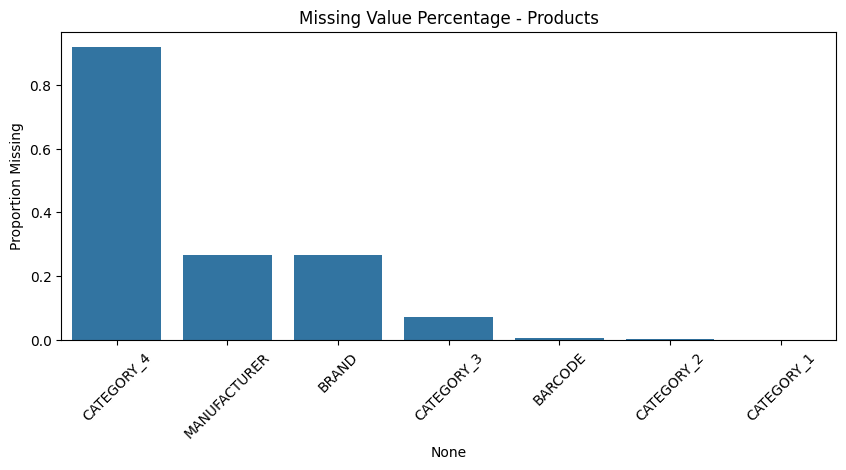

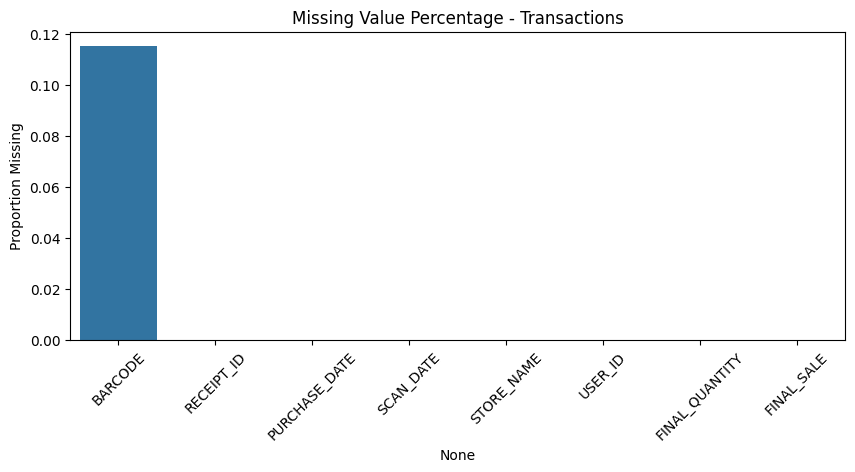

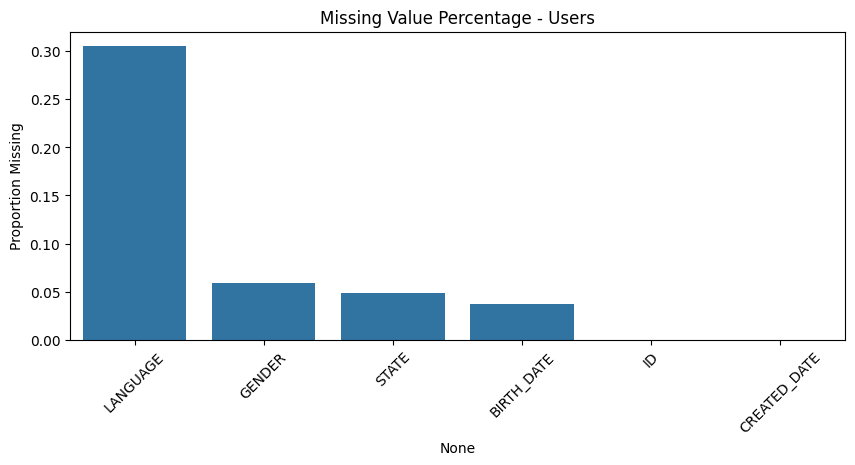

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot missing values across all datasets
def plot_missing(df, title):
    nulls = df.isnull().mean().sort_values(ascending=False)
    plt.figure(figsize=(10, 4))
    sns.barplot(x=nulls.index, y=nulls.values)
    plt.title(f'Missing Value Percentage - {title}')
    plt.ylabel('Proportion Missing')
    plt.xticks(rotation=45)
    plt.show()

plot_missing(products_df, "Products")
plot_missing(transactions_df, "Transactions")
plot_missing(users_df, "Users")

In [8]:
# Calculate percentage of missing BARCODE values in the Transactions dataset
missing_barcode_pct = transactions_df['BARCODE'].isnull().mean() * 100
print(f"Missing BARCODE in Transactions: {missing_barcode_pct:.2f}%")

Missing BARCODE in Transactions: 11.52%


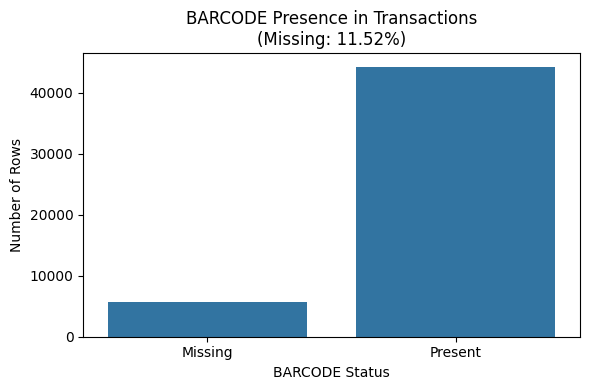

In [9]:
# Plot : Missing BARCODE percentage
missing_barcode_pct = transactions_df['BARCODE'].isnull().mean() * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=["Missing", "Present"], y=[
    transactions_df['BARCODE'].isnull().sum(),
    transactions_df['BARCODE'].notnull().sum()
])
plt.title(f"BARCODE Presence in Transactions\n(Missing: {missing_barcode_pct:.2f}%)")
plt.ylabel("Number of Rows")
plt.xlabel("BARCODE Status")
plt.tight_layout()
plt.show()


In [10]:
# Inspect value distribution in FINAL_QUANTITY to identify invalid entries like "zero"
print("Unique values in FINAL_QUANTITY:")
print(transactions_df['FINAL_QUANTITY'].value_counts())

# Inspect value distribution in FINAL_SALE to detect blank strings or other invalid formats
print("\nUnique values in FINAL_SALE:")
print(transactions_df['FINAL_SALE'].value_counts())

Unique values in FINAL_QUANTITY:
FINAL_QUANTITY
1.00    35698
zero    12500
2.00     1285
3.00      184
4.00      139
        ...  
6.22        1
1.22        1
1.23        1
2.57        1
2.27        1
Name: count, Length: 87, dtype: int64

Unique values in FINAL_SALE:
FINAL_SALE
         12500
1.25      1323
1.00       744
2.99       588
1.99       586
         ...  
16.47        1
10.92        1
61.30        1
13.14        1
42.38        1
Name: count, Length: 1435, dtype: int64


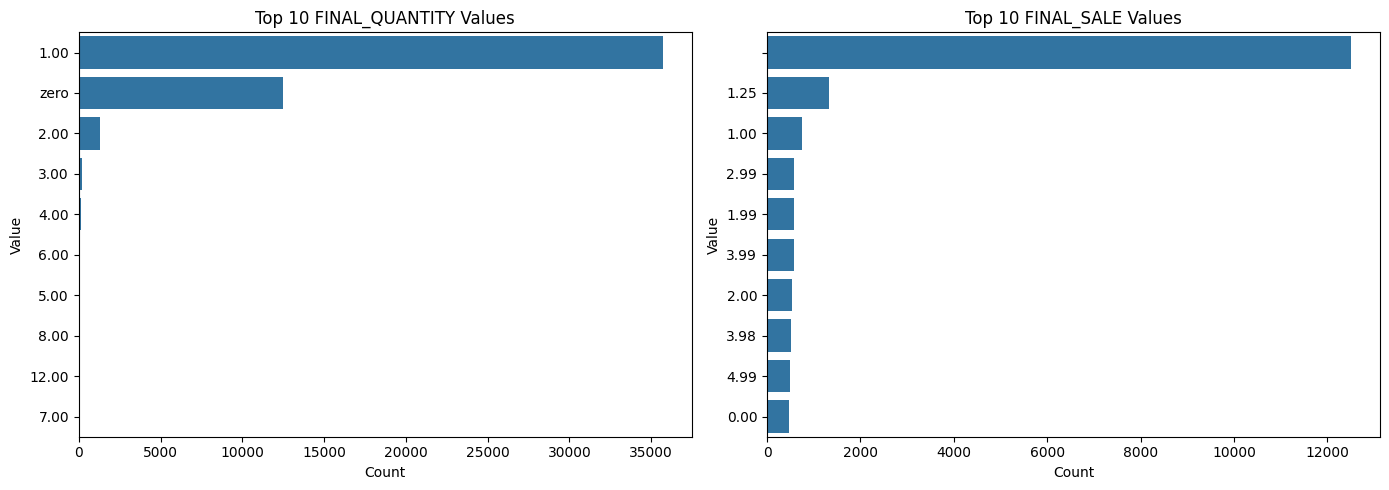

In [11]:
# Plot : Invalid FINAL_QUANTITY and FINAL_SALE values
qty_counts = transactions_df['FINAL_QUANTITY'].value_counts(dropna=False)
sale_counts = transactions_df['FINAL_SALE'].value_counts(dropna=False)

# Focus on top 10 values for readability
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(y=qty_counts.head(10).index.astype(str), x=qty_counts.head(10).values)
plt.title("Top 10 FINAL_QUANTITY Values")
plt.xlabel("Count")
plt.ylabel("Value")

plt.subplot(1, 2, 2)
sns.barplot(y=sale_counts.head(10).index.astype(str), x=sale_counts.head(10).values)
plt.title("Top 10 FINAL_SALE Values")
plt.xlabel("Count")
plt.ylabel("Value")

plt.tight_layout()
plt.show()

In [12]:
# Calculate the percentage of missing LANGUAGE values
missing_language_pct = users_df['LANGUAGE'].isnull().mean() * 100

# Print the result
print(f"Missing LANGUAGE in Users: {missing_language_pct:.2f}%")

Missing LANGUAGE in Users: 30.51%


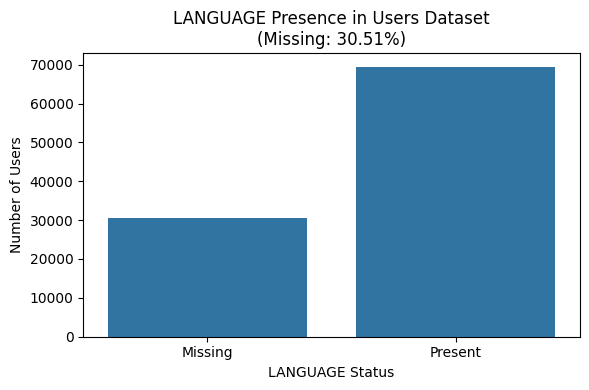

In [13]:
# Calculate missing percentage for LANGUAGE
missing_language_pct = users_df['LANGUAGE'].isnull().mean() * 100

# Plot missing vs present values for LANGUAGE
plt.figure(figsize=(6, 4))
sns.barplot(x=["Missing", "Present"], y=[
    users_df['LANGUAGE'].isnull().sum(),
    users_df['LANGUAGE'].notnull().sum()
])
plt.title(f"LANGUAGE Presence in Users Dataset\n(Missing: {missing_language_pct:.2f}%)")
plt.ylabel("Number of Users")
plt.xlabel("LANGUAGE Status")
plt.tight_layout()
plt.show()

In [14]:
# Calculate missing value percentages
missing_gender_pct = users_df['GENDER'].isnull().mean() * 100
missing_state_pct = users_df['STATE'].isnull().mean() * 100
missing_birth_date_pct = users_df['BIRTH_DATE'].isnull().mean() * 100

# Print formatted results
print(f"Missing GENDER: {missing_gender_pct:.2f}%")
print(f"Missing STATE: {missing_state_pct:.2f}%")
print(f"Missing BIRTH_DATE: {missing_birth_date_pct:.2f}%")

Missing GENDER: 5.89%
Missing STATE: 4.81%
Missing BIRTH_DATE: 3.67%


<Figure size 800x500 with 0 Axes>

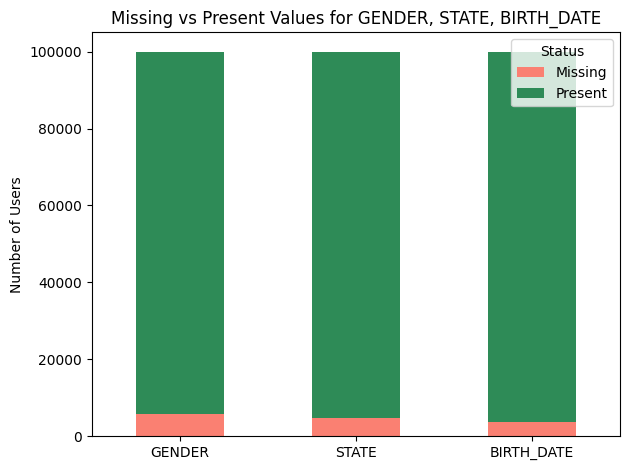

In [15]:
missing_values = {
    'GENDER': users_df['GENDER'].isnull().sum(),
    'STATE': users_df['STATE'].isnull().sum(),
    'BIRTH_DATE': users_df['BIRTH_DATE'].isnull().sum()
}
present_values = {
    'GENDER': users_df['GENDER'].notnull().sum(),
    'STATE': users_df['STATE'].notnull().sum(),
    'BIRTH_DATE': users_df['BIRTH_DATE'].notnull().sum()
}

# Prepare data for plotting
missing_data_df = pd.DataFrame({
    'Missing': missing_values,
    'Present': present_values
}).T

# Transpose for stacked bar chart
missing_data_df = missing_data_df.T

# Plot
plt.figure(figsize=(8, 5))
missing_data_df.plot(kind='bar', stacked=True, color=['salmon', 'seagreen'])
plt.title("Missing vs Present Values for GENDER, STATE, BIRTH_DATE")
plt.ylabel("Number of Users")
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

 ## 1. Category Depth Histogram

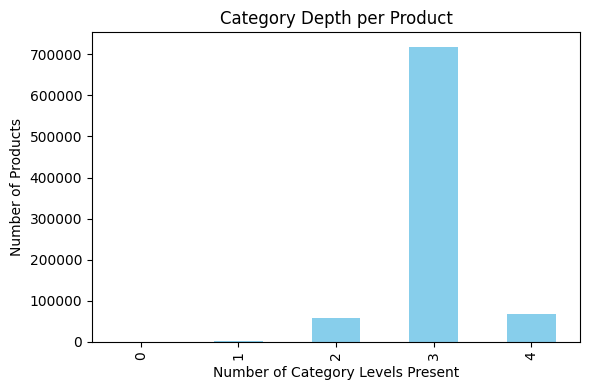

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Count how many category levels each product uses
products_df['category_depth'] = products_df[['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4']].notnull().sum(axis=1)

# Plot the distribution
plt.figure(figsize=(6, 4))
products_df['category_depth'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Category Depth per Product")
plt.xlabel("Number of Category Levels Present")
plt.ylabel("Number of Products")
plt.tight_layout()
plt.show()

## 2. Barcode Length Distribution

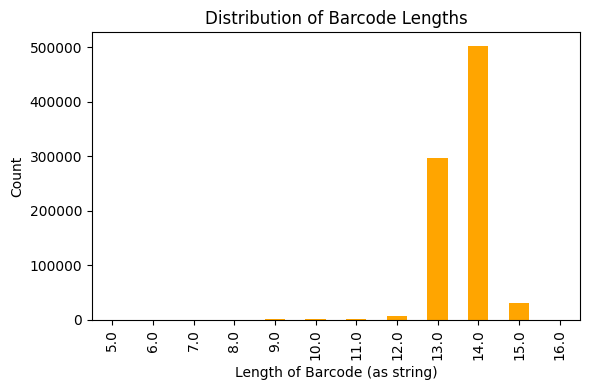

In [17]:
products_df['BARCODE'] = products_df['BARCODE'].dropna().astype(str)
products_df['barcode_length'] = products_df['BARCODE'].str.len()

plt.figure(figsize=(6, 4))
products_df['barcode_length'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title("Distribution of Barcode Lengths")
plt.xlabel("Length of Barcode (as string)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()